# Project 1: Customer Service Requests Analysis

In [1]:
#Import libraries
import numpy as np
import pandas as pd

import datetime
import calendar

import itertools
from scipy.stats import chi2_contingency, f_oneway

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



# Task 1: Data acquisition

In [2]:
#load data
Service_requests = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date", "Resolution Action Updated Date"])

# Understanding data

In [3]:
Service_requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#Schema of the data, checking data types and non null count of columns
Service_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [5]:
#Calculating Percentages of missing values
Service_requests.isnull().sum().sort_values(ascending=False)/len(Service_requests)*100

School or Citywide Complaint      100.000000
Vehicle Type                      100.000000
Taxi Company Borough              100.000000
Taxi Pick Up Location             100.000000
Garage Lot Name                   100.000000
Ferry Direction                    99.999667
Ferry Terminal Name                99.999335
Road Ramp                          99.929165
Bridge Highway Segment             99.929165
Bridge Highway Name                99.919188
Bridge Highway Direction           99.919188
Landmark                           99.883937
Intersection Street 2              85.579552
Intersection Street 1              85.414602
Cross Street 2                     16.554483
Cross Street 1                     16.388203
Street Name                        14.768971
Incident Address                   14.768971
Descriptor                          1.966757
X Coordinate (State Plane)          1.177261
Latitude                            1.177261
Longitude                           1.177261
Y Coordina

In [6]:
# drop columns with 100% data
Service_requests.drop(["School or Citywide Complaint", "Vehicle Type", "Taxi Company Borough", "Taxi Pick Up Location",
                 "Garage Lot Name"], axis =1, inplace=True)
print(Service_requests.shape)

(300698, 48)


# Task 2: Exploring the datetime module

In [7]:
#Complaint resolution time
Service_requests["Request_Closing_Time"] = (Service_requests["Closed Date"] - Service_requests["Created Date"]).dt.total_seconds()
Service_requests["Resolution_Time_Minutes"] = (Service_requests["Request_Closing_Time"])/60

# extracting the day of week, day of month, month and year from the given created dates
Service_requests["Day of Week"] = Service_requests["Created Date"].dt.dayofweek
Service_requests["Date"] = Service_requests["Created Date"].dt.date
Service_requests["Month"] = Service_requests["Created Date"].dt.strftime('%b')
Service_requests["Year"] = Service_requests["Created Date"].dt.year
print(Service_requests.shape)

(300698, 54)


# Task 3: Exploratory Data Analysis for major insights / patterns


In [8]:
#Exploring the status of tickets
print("Complaints were recorded from : ", min(Service_requests["Created Date"]))
print("Complaints were last recorded on : ", max(Service_requests["Created Date"]))
print()
print(Service_requests["Status"].value_counts().to_frame())

Complaints were recorded from :  2015-03-29 00:33:01
Complaints were last recorded on :  2015-12-31 23:59:45

          Status
Closed    298471
Open        1439
Assigned     786
Draft          2


Insight 1 conclusions
- The recording period was from 29 March 2015 to 31 December 2015
- 2227 complaints are still not resolved

    

## Exploring complaint types

In [9]:
# Number of unique complaint types
Service_requests["Complaint Type"].nunique()

24

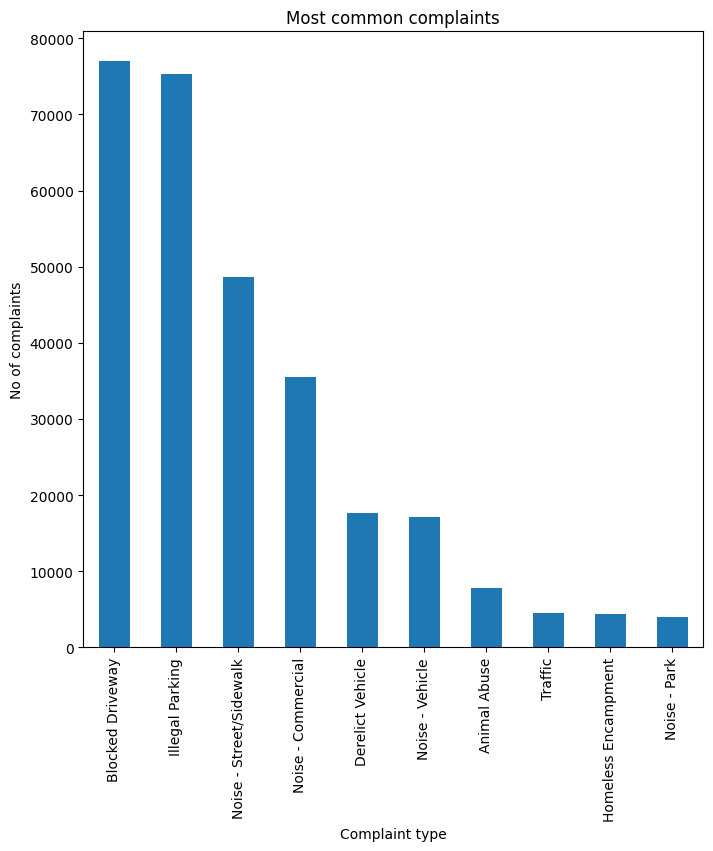

In [10]:
#Most common complaints
Service_requests["Complaint Type"].value_counts().head(10).plot(kind = "bar", figsize =(8,8),
                        title="Most common complaints", xlabel="Complaint type", ylabel= ("No of complaints"))
plt.show()

### Notes
24 different complaints were recorded, with blocked driveway and illegal parking respectively leading.


In [11]:
# Count of the descriptors causing the most frequent complaint type (blocked driveways)
Service_requests[Service_requests["Complaint Type"] =="Blocked Driveway"]["Descriptor"].value_counts()

No Access         56976
Partial Access    20068
Name: Descriptor, dtype: int64

Text(0, 0.5, 'No of Complaints')

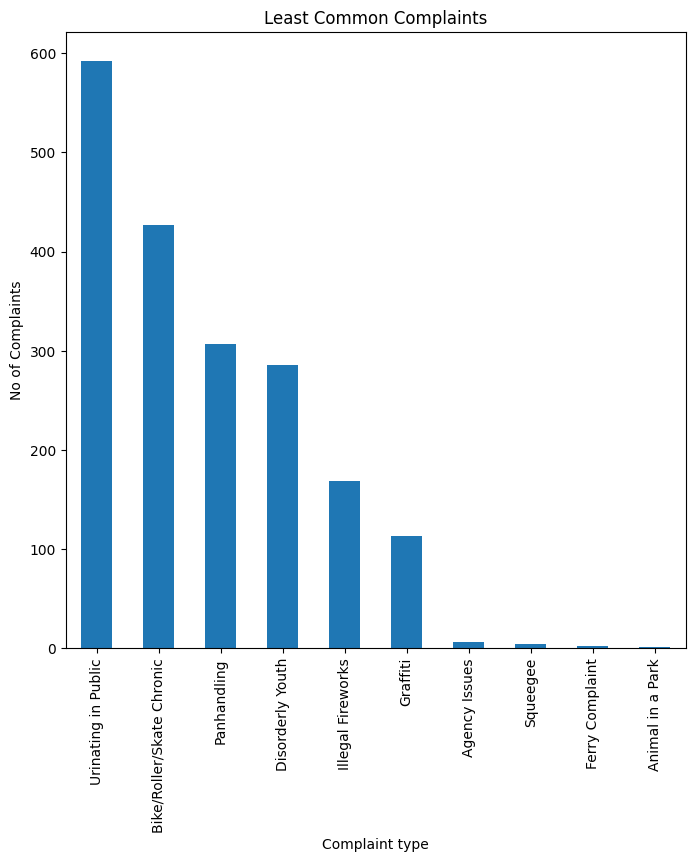

In [12]:
# Least common complaint types
Service_requests["Complaint Type"].value_counts().tail(10).plot(kind = "bar", figsize =(8,8))
plt.title("Least Common Complaints")
plt.xlabel("Complaint type")
plt.ylabel("No of Complaints")

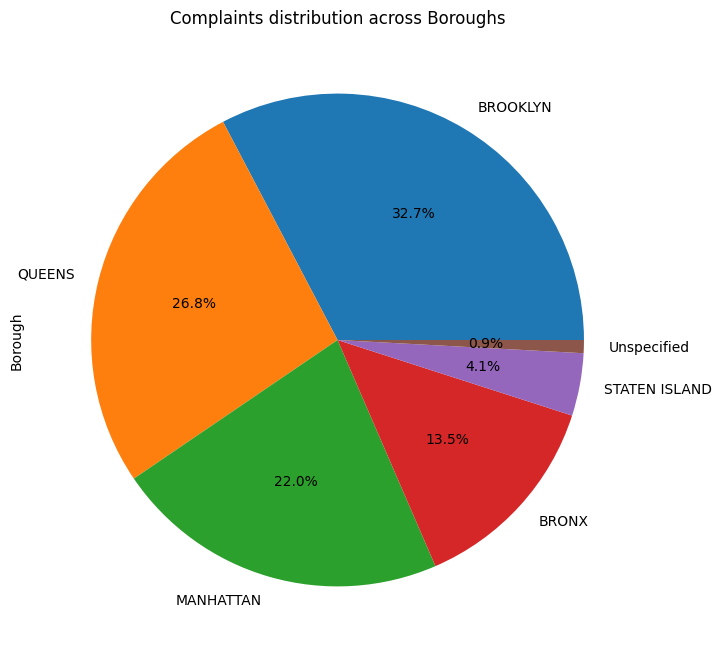

In [13]:
# Complaint distribution across boroughs
Service_requests['Borough'].value_counts().plot(kind="pie",autopct ="%1.1f%%",
                                                figsize = (10,8), title ="Complaints distribution across Boroughs")
plt.show()

## Notes
Brooklyn recorded the most complaints

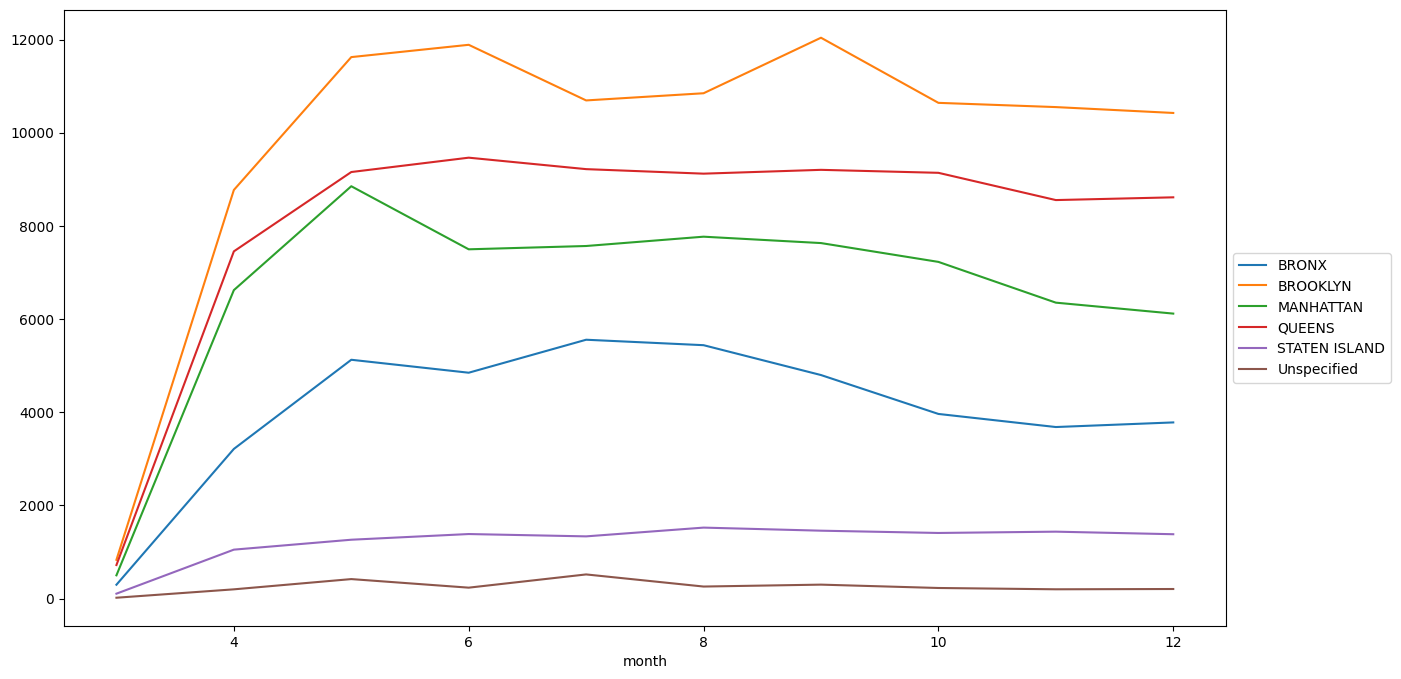

In [14]:
#Monthly complaints across boroughs
Service_requests["month"]= Service_requests["Created Date"].dt.month
Service_requests.groupby(["month", "Borough"]).size().unstack().plot(figsize = (15,8))
plt.legend(loc= "center left", bbox_to_anchor = (1.0,0.5))
plt.show()

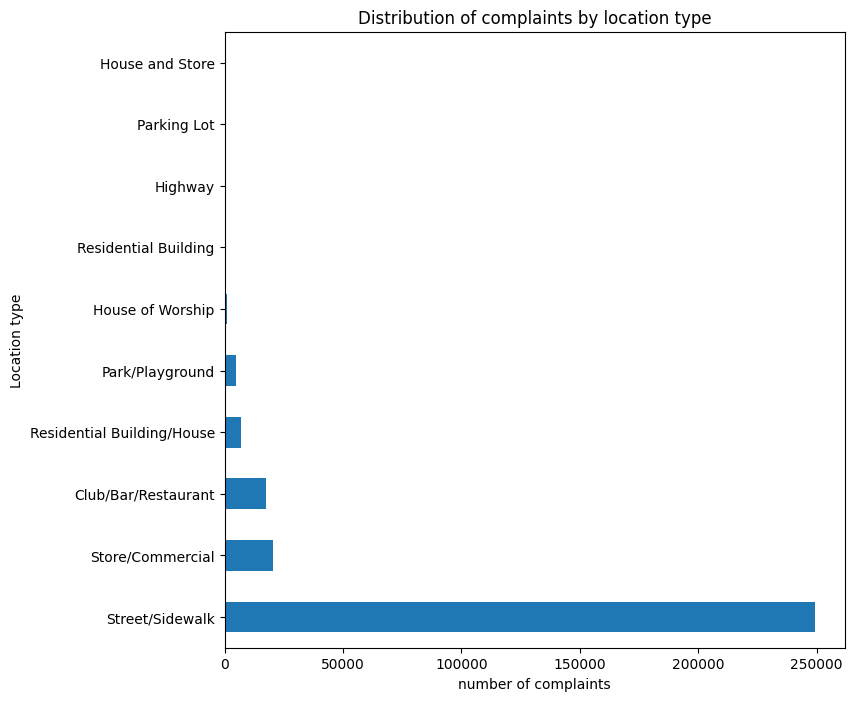

In [15]:
#Explore data for location type
Service_requests["Location Type"].value_counts().head(10).plot(kind = "barh", figsize =(8,8),
                                                               title="Distribution of complaints by location type",
                                                               xlabel="number of complaints", ylabel= ("Location type"))
plt.show()

## Analysing Speed to resolving complaints

In [16]:
# Quickest resolved complaint
Quickest_Resolution = Service_requests.groupby("Complaint Type")["Resolution_Time_Minutes"].mean().sort_values(ascending=True)
Quickest_Resolution

Complaint Type
Posting Advertisement          118.548200
Illegal Fireworks              165.668353
Noise - Commercial             188.829266
Noise - House of Worship       191.597901
Noise - Park                   204.643950
Noise - Street/Sidewalk        206.713445
Traffic                        206.920867
Disorderly Youth               213.515035
Noise - Vehicle                215.339604
Urinating in Public            217.599859
Bike/Roller/Skate Chronic      225.987736
Drinking                       231.709974
Vending                        240.835121
Squeegee                       242.737500
Homeless Encampment            261.934209
Panhandling                    262.366066
Illegal Parking                270.069091
Blocked Driveway               284.454311
Animal Abuse                   312.794630
Agency Issues                  315.619444
Graffiti                       429.075074
Derelict Vehicle               441.848379
Animal in a Park             20210.083333
Ferry Complaint    

Posting advertisement is the quickest resolved complaint whilst animal in park complaint takes the longest to be resolved

In [17]:
# Quickest city to resolve complaints
Quickest_City = Service_requests.groupby("City")["Resolution_Time_Minutes"].mean().sort_values(ascending=True)
# Get the city with the fastest resolution time
quickest_city_name = Quickest_City.index[0]
quickest_city_time = Quickest_City.iloc[0]

# Get the city with the slowest resolution time
slowest_city_name = Quickest_City.index[-1]
slowest_city_time = Quickest_City.iloc[-1]

print(f"The quickest city to resolve complaints is {quickest_city_name} , taking an average of {quickest_city_time:.2f} minutes.")
print()
print(f"The slowest city to resolve complaints is {slowest_city_name}, taking an average of {slowest_city_time:.2f} minutes.")

The quickest city to resolve complaints is ARVERNE , taking an average of 135.90 minutes.

The slowest city to resolve complaints is QUEENS, taking an average of 815.59 minutes.


On average, arvene is the city which quickly resolves complaints whilst Queens is the slowest

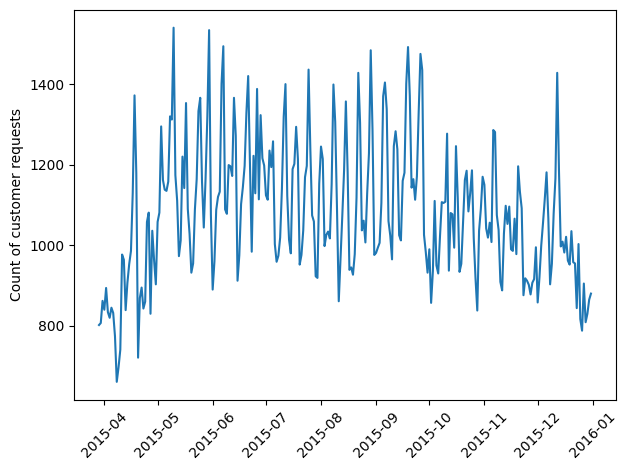

In [20]:
#Line gragh showing the frequency of complaints per day
daily_complaints = Service_requests["Date"].value_counts().sort_index()
plt.plot(daily_complaints.index, daily_complaints.values)
plt.xticks(rotation=45)
plt.ylabel('Count of customer requests')
plt.tight_layout()
plt.show()

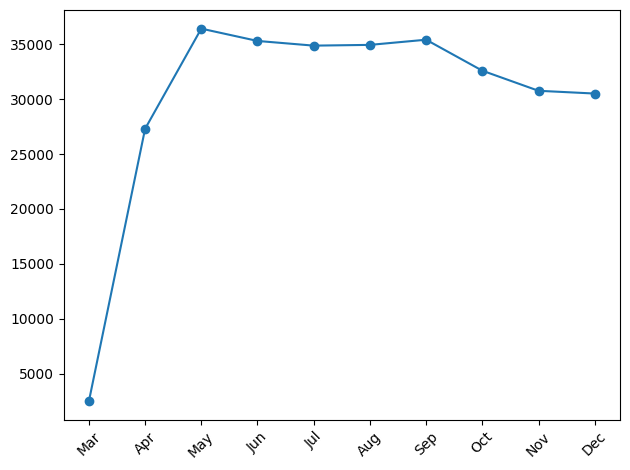

In [19]:
#Line gragh showing the frequency of complaints per month
daily_complaints = Service_requests["Month"].value_counts().sort_index()
ordered_months_abbr = list(calendar.month_abbr)[1:]
sorted_months = daily_complaints.reindex(ordered_months_abbr)
plt.plot(sorted_months.index, sorted_months.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 4
Ordering complaint types based on the average request closing time

In [27]:
Sorted_complaints = Service_requests.groupby('Complaint Type')['Request_Closing_Time'].mean()
Sorted_complaints.head()

Complaint Type
Agency Issues                1.893717e+04
Animal Abuse                 1.876768e+04
Animal in a Park             1.212605e+06
Bike/Roller/Skate Chronic    1.355926e+04
Blocked Driveway             1.706726e+04
Name: Request_Closing_Time, dtype: float64

In [28]:
#Average customer requests resolution time
mean_seconds = Service_requests["Request_Closing_Time"].mean()
mean_hours= mean_seconds / 3600
mean_hours

4.314397995240445

# Four major conclusions after generic data mining
- For the perion 29 march to 31 December 2015, 2227 complaints are still pending to be resolved
- 24 unique complaints were lodged, blocked driveway was the most recorded
- Blooklyn is the borough which received the most complaints
- The average resolution time of complaints is 4.3hrs.

# Task 5: Statistical tests

Determining whether average response time across complaint type is similar or not

# a) Hypothesis testing

- H0 : Average response time for all the complaint types is the same

- H1 : At least one group of complaints has diffrent average response time

In [29]:
# Removing all nans in dataset for effecient statistivcal analysis
Service_requests = Service_requests.dropna(subset=["Request_Closing_Time"])

In [30]:
average_response_time = Service_requests.groupby("Complaint Type")["Request_Closing_Time"].mean()
# Dictionary to store response times for each complaint type
response_times_by_group = {}
for complaint_type, group_data in Service_requests.groupby("Complaint Type")["Request_Closing_Time"]:
    response_times_by_group[complaint_type] = group_data.values
#Anova Test
f_statistic, p_value = f_oneway(*response_times_by_group.values())
# Define the significance level
alpha = 0.05

print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a strong evidence that at least one of the complaint types has a different average response time.")
else:
    print("Cannot reject the null hypothesis: Average response times between complaint types are similar.")



p-value: 0.0
Reject the null hypothesis: There is a strong evidence that at least one of the complaint types has a different average response time.


In [31]:
# Checking the standard deviation
std_deviation = average_response_time.std()
print("Standard Deviation of Average Response Time is :", std_deviation)

Standard Deviation of Average Response Time is : 249786.60423629778


## Notes
- From above ANOVA, the average response time across complaint types is not equal hence H0 is rejected
- A high standard deviation mean suggests variability or inconsistency in response times within complaint types.

# b) Correlation
- Finding whether complaint or service requests and location are related
- We are to compare 2 categorical variables so will use chi square test

### Using chi2_ contigency to test for independence of Complaint type and location type
- Null Hypothesis (H0): There is no association between the variables, complaints type is independent of location type
- Alternative Hypothesis (Ha): There is an association between the variables,Complaints type is not independent of Location type

In [32]:
cross_tab = pd.crosstab(Service_requests["Complaint Type"], Service_requests["Location Type"])
chi2_stat,p,dof,expectd = chi2_contingency(cross_tab)
chi2_stat,p,dof

(1328207.967082067, 0.0, 315)

# Checking the correlations with complaint type, location type, city and borough

In [39]:
categorical_features = ['Complaint Type', 'Location Type', 'City', "Borough"]

for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        contingency_table = pd.crosstab(Service_requests[categorical_features[i]], Service_requests[categorical_features[j]])
        chi2_stat, p_val,dof,expectd= chi2_contingency(contingency_table)
        print(f"Chi-Square Test between {categorical_features[i]} and {categorical_features[j]}:")
        print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")


Chi-Square Test between Complaint Type and Location Type:
Chi-Square Statistic: 1328207.967082067, p-value: 0.0
Chi-Square Test between Complaint Type and City:
Chi-Square Statistic: 119737.34755994167, p-value: 0.0
Chi-Square Test between Complaint Type and Borough:
Chi-Square Statistic: 82354.48495581644, p-value: 0.0
Chi-Square Test between Location Type and City:
Chi-Square Statistic: 41001.60271724522, p-value: 0.0
Chi-Square Test between Location Type and Borough:
Chi-Square Statistic: 13268.42454561731, p-value: 0.0
Chi-Square Test between City and Borough:
Chi-Square Statistic: 1201261.1758627582, p-value: 0.0


### Using itertools

In [40]:
for i, j in itertools.combinations(range(len(categorical_features)), 2):
  contingency_table = pd.crosstab(Service_requests[categorical_features[i]], Service_requests[categorical_features[j]])
  chi2_stat, p_val,dof,expectd= chi2_contingency(contingency_table)
  print(f"Chi-Square Test between {categorical_features[i]} and {categorical_features[j]}:")
  print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")



Chi-Square Test between Complaint Type and Location Type:
Chi-Square Statistic: 1328207.967082067, p-value: 0.0
Chi-Square Test between Complaint Type and City:
Chi-Square Statistic: 119737.34755994167, p-value: 0.0
Chi-Square Test between Complaint Type and Borough:
Chi-Square Statistic: 82354.48495581644, p-value: 0.0
Chi-Square Test between Location Type and City:
Chi-Square Statistic: 41001.60271724522, p-value: 0.0
Chi-Square Test between Location Type and Borough:
Chi-Square Statistic: 13268.42454561731, p-value: 0.0
Chi-Square Test between City and Borough:
Chi-Square Statistic: 1201261.1758627582, p-value: 0.0


# Conclusion:
- There is significant evidence to reject the null hypothesis.
- There is a correlation between complaint type and location type
- The observed data is highly unlikely under the assumption that the null hypothesis is true.